# Домашнее задание № 3 Построение заявочной скоринговой модели
**Общая информация:**
- ⚡Дата выдачи: 14 марта 2023
- ⏰ Мягкий дедлайн 23:59MSK 27.03.2023
- ⏰ Жесткий дедлайн 23:59MSK 30.03.2023
- ✍ работы должны быть высланы на почту maria.vorobyova.ser@gmail.com с темой HSE_CS_[направление]_ФИО, например HSE_CS_ПАД_ИВАНОВ_ИВАН_ИВАНОВИЧ

**Оценивание и штрафы:**

Максимальный балл за работу — 10 баллов. За каждый день просрочки снимается 1 балл. После жесткого дедлайна сдача невозможна. 

Задание должно быть выполнено самостоятельно, «похожие» решения будут рассмотрены как "плагиат" и все похожие работы будут оценены баллом 0.

_Оценка будет снижена, если_ 
- нет комментариев 
- код написан плохо, непонятно
- сделаны неверные выводы

**Что нужно сделать?**

Необходимо построить модель, оценивающую вероятность дефолта клиента на стадии заведения кредитной заявки. Идти нужно строго по ноутбуку и выполнять задания каждого блока.

Перед началом выполнения работы необходимо скачать 2 датасета:
 - Данные с одобренными кредитными заявками [датасет](https://drive.google.com/file/d/1YUEMYCmvLs786AyIUV4l4NZg6k4Sb1cj/view?usp=share_link)
 - Данные с отказанными кредитными заявками [датасет](https://drive.google.com/file/d/1Q1YS4HKJVkTkIRTQsxSzutuKiM5mxUqx/view?usp=share_link)

Описание датасета:

1. target - целевая переменная (1- клиент достиг просрочку 90 дней в первый год кредита, 0 - иначе)
2. INCOME_TYPE - тип подтверждения дохода                
3. EDUCATION_  -  образование               
4. CUSTOMER_CATEGORY_  - категория клиента         
5. income   - доход клиента                  
6. DEPENDANT_NUMBER   - количество иждевенцев         
7. IS_EMPL    - это сотрудник банка                  
8. COUNT_ACTIVE_CREDIT_NO_CC  - количество октрытых кредитов без учета кредитных карт
9. CNT_MNTH_FROM_LAST_PMNT    - сколько месяцев прошло с момента последнего платежа по предудущему кредиту
10. age  - возраст клиента                     
11. experience  - стаж клиента               
12. inquiry_14_day   - количество запросов в бюро кредитных историй за последние 14 дней          
13. inquiry_21_day   - количество запросов в бюро кредитных историй за последние 21 день                  
14. count_mnth_act_passport - сколько месяцев прошло с момента выдачи выдачи паспорта     
15. UID  - ID заявки    

Желаем вам удачи!✌

Ссылка на слайды [семинара](https://drive.google.com/file/d/18ox08w_016lopYZYu248Z6HHcYytsvus/view?usp=sharing) 

In [344]:
# import библиотек
import pandas as pd
import numpy as np
import seaborn as sns

# чтобы отобразить больше столбцов и строк
# pd.options.display.max_rows = 50
pd.options.display.max_columns = 200

import warnings
warnings.filterwarnings('error')


# для работы с датами, временем
from datetime import timedelta
import datetime as dt

# для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.facecolor'] = 'white'

from pathlib import Path

In [345]:
# считать данные
accept = pd.read_csv(Path.cwd()/'data'/'accept.csv')
reject = pd.read_csv(Path.cwd()/'data'/'reject.csv')

# Explatory Data Analysis. Максимально - 2 балла

- 0 баллов, если задание не выполнено
- 1 балл, если посчитаны статистики,есть какие-то графики (важно, ПОЛЕЗНЫЕ графики), но не сделаны выводы
- 2 балла, если посчитаны статистики и есть графики (важно, ПОЛЕЗНЫЕ графики) и сделаны ВЫВОДЫ (важно, что выводы правильные)

In [346]:
accept

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
2,0,2NDFL,advanced,NaN,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,NaN,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843
32550,1,OTHER,advanced,NaN,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153
32551,1,OTHER,advanced,NaN,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154
32552,1,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,NaN,NaN,6.935759,140165


In [347]:
# Columns, their type, how many non-null values
accept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32554 entries, 0 to 32553
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     32554 non-null  int64  
 1   INCOME_TYPE                32554 non-null  object 
 2   EDUCATION_                 32554 non-null  object 
 3   CUSTOMER_CATEGORY_         13095 non-null  object 
 4   income                     31901 non-null  float64
 5   DEPENDANT_NUMBER           32514 non-null  float64
 6   IS_EMPL                    32554 non-null  int64  
 7   COUNT_ACTIVE_CREDIT_NO_CC  24190 non-null  float64
 8   CNT_MNTH_FROM_LAST_PMNT    22409 non-null  float64
 9   age                        32554 non-null  float64
 10  experience                 32507 non-null  float64
 11  inquiry_14_day             23333 non-null  float64
 12  inquiry_21_day             23333 non-null  float64
 13  count_mnth_act_passport    32554 non-null  flo

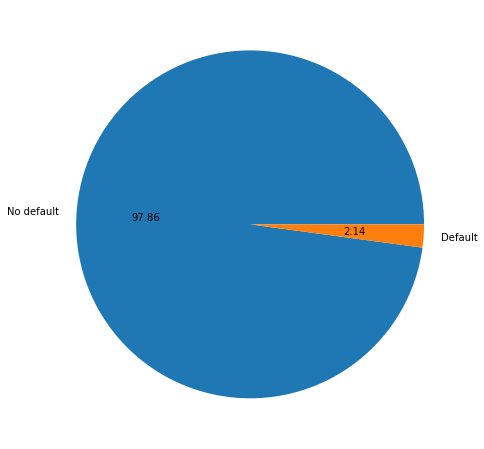

In [348]:
# Target distribution
plt.pie(accept['target'].value_counts(), labels=['No default', 'Default'], autopct='%.2f');

We can see that previous prdection for accepting a credit is 2.14% which is a great score

## Numerical variable analysis

In [349]:
accept.describe().T

,count,mean,std,min,25%,50%,75%,max
target,32554.0,0.021411,0.144751,0.000000,0.000000,0.000000,0.000000,1.000000e+00
income,31901.0,61331.770634,106932.972771,0.000000,26778.000000,41463.000000,70000.000000,1.145038e+07
DEPENDANT_NUMBER,32514.0,0.006182,0.096019,0.000000,0.000000,0.000000,0.000000,4.000000e+00
IS_EMPL,32554.0,0.390152,0.487792,0.000000,0.000000,0.000000,1.000000,1.000000e+00
COUNT_ACTIVE_CREDIT_NO_CC,24190.0,0.661926,0.835298,0.000000,0.000000,0.000000,1.000000,8.000000e+00
CNT_MNTH_FROM_LAST_PMNT,22409.0,20.856970,143.422108,-66.559028,0.530578,0.928136,3.667899,1.365277e+03
age,32554.0,36.432497,8.219484,25.000187,29.507145,34.734015,42.200724,6.232055e+01
experience,32507.0,4.889609,5.344778,-157.184939,1.241436,3.279452,6.479452,1.011924e+02
inquiry_14_day,23333.0,0.362277,0.611643,0.000000,0.000000,0.000000,1.000000,6.000000e+00
inquiry_21_day,23333.0,0.426006,0.685549,0.000000,0.000000,0.000000,1.000000,8.000000e+00


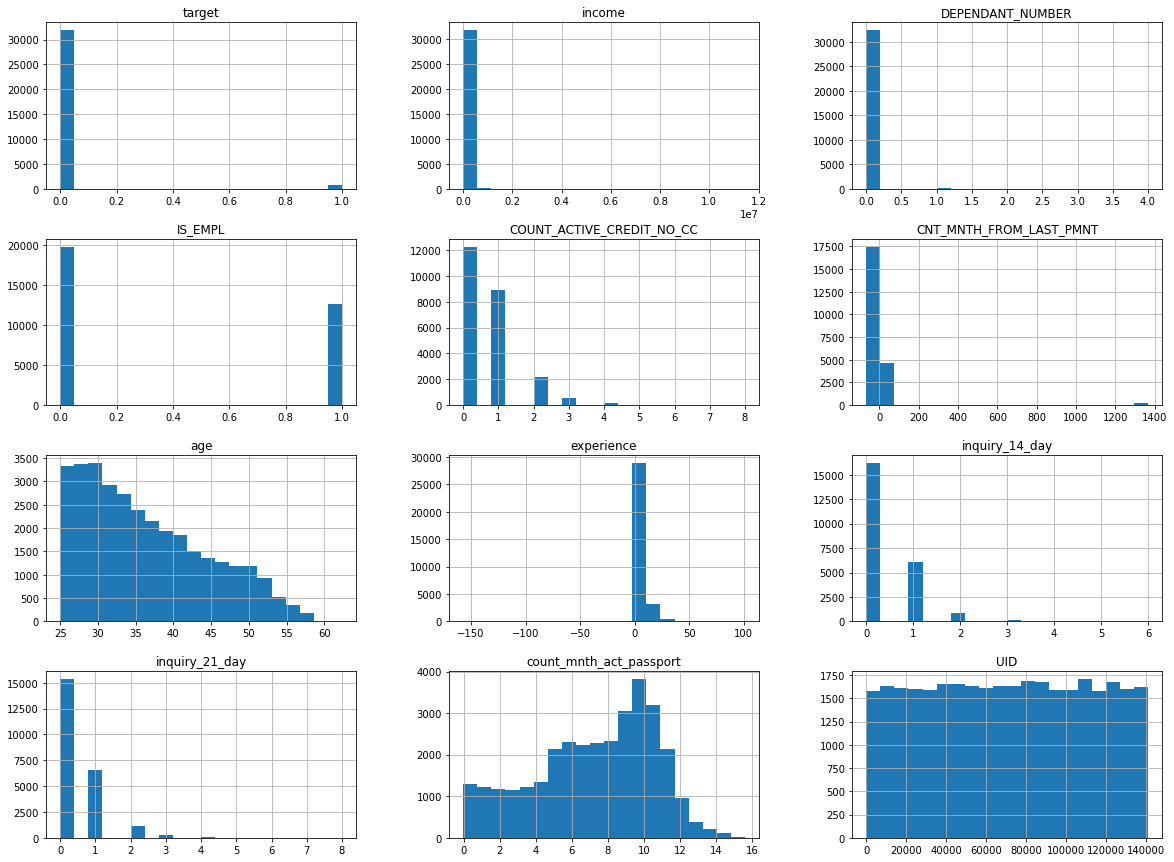

In [350]:
accept.hist(bins=20, figsize=(20, 15));

From above histograms, notice the following:
- income scope is extremely large with values as high as 12,000,000. We can only assume that clients with extremely large income do not belong to our study segment and should be treated individually, therefore, we can remove these observations as they are not representative of our population. Let us remove observations with income above the highest default. 

- experiene scope contains negative values, which is obviously incorrect. Thus, we should substitute these values with NaN's.

- CNT_MNTH_FROM_LAST_PMNT has strange group of outliers with values around 1350 with no observations inbetween these values and the rest. Most likely this some error, a sensible solution would be to substitute all values above 200 with NaN's.

In [351]:
# Remove all top (income) observations, above the first value which defaulted
threshold = accept['income'].loc[accept['target'] == 1].max()
removed = accept[accept['income'] > threshold].shape[0]
accept = accept[accept['income'] <= threshold]
print(f'Threshold income: {threshold}, Observations removed: {removed}')

Threshold income: 444986.0, Observations removed: 161


In [352]:
# Substitute observations with negative experience with NaN
accept.loc[accept['experience'] < 0, 'experience'] = np.nan

In [353]:
# Substitute CNT_MNTH_FROM_LAST_PMNT above 200 or below 0 with NaN
accept.loc[(accept['CNT_MNTH_FROM_LAST_PMNT'] > 200) | (accept['CNT_MNTH_FROM_LAST_PMNT'] < 0), 'CNT_MNTH_FROM_LAST_PMNT'] = np.nan

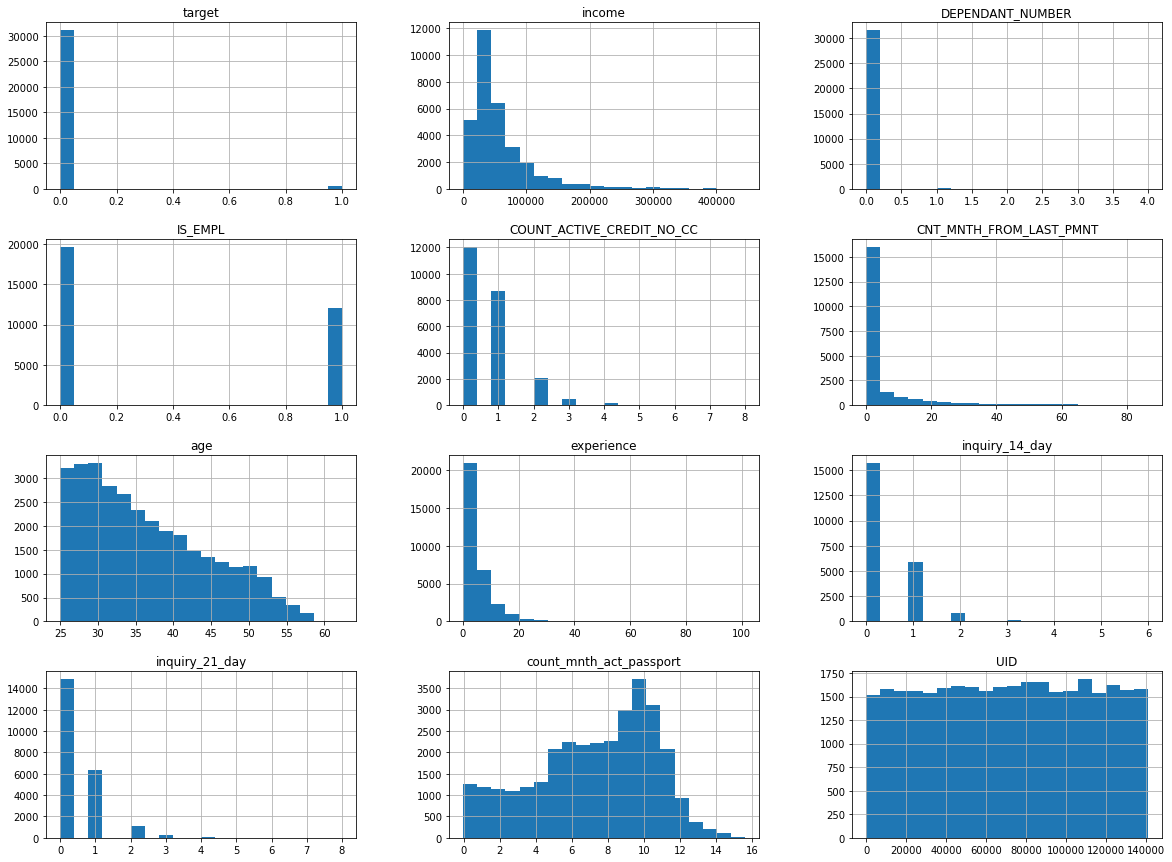

In [354]:
accept.hist(bins=20, figsize=(20, 15));

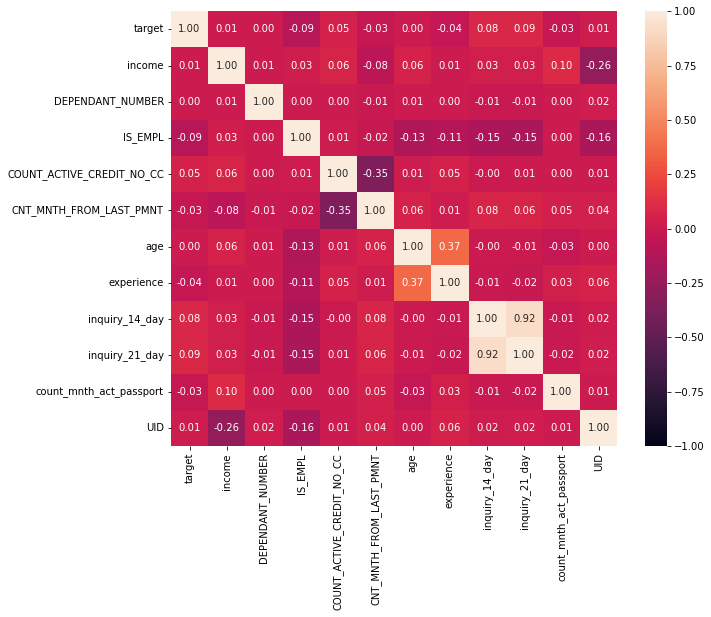

In [355]:
sns.heatmap(accept.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1);

In [356]:
accept.isnull().sum().sort_values(ascending=False)

CUSTOMER_CATEGORY_           18765
CNT_MNTH_FROM_LAST_PMNT      10743
inquiry_14_day                9057
inquiry_21_day                9057
COUNT_ACTIVE_CREDIT_NO_CC     8222
experience                       7
DEPENDANT_NUMBER                 1
target                           0
INCOME_TYPE                      0
EDUCATION_                       0
income                           0
IS_EMPL                          0
age                              0
count_mnth_act_passport          0
UID                              0
dtype: int64

1. CUSTOMER_CATEGORY_ has more than half missing values, which means that it would be impossible to restore values with a correct distribution, therefore, the best option is to drop this feature

2. inquiry_14_day and inquiry_21_day are highly correlated, 21 day is a slightly more extensive period than 14 days, both have same amount of missing observations - 9057. Judging by these factors, it is better to leave only inquiry_21_day feature adn drop the other one to avoid multicolinearity.

3. for the remaing features with large amounts of missing observations: CNT_MNTH_FROM_LAST_PMNT, inquiry_21_day, COUNT_ACTIVE_CREDIT_NO_CC, I will add dummy variables for whether the observation is present and for data clarity substitute NaN's with 0's as, firstly, absense of observation may imply that there are no previous records and 0 represents that, secondly, in combination with the dummy variable should provide interpretable results for the model

4. We can drop observations where experience or DEPENDANT_NUMBER are NaN, since there are 8 total such ones at max, we can sefely do that without losing data

In [357]:
### 1 and 2 ###
accept = accept.drop(columns=['CUSTOMER_CATEGORY_', 'inquiry_14_day'])
### 3 ###
accept['missing_CNT_MNTH_FROM_LAST_PMNT'] = accept['CNT_MNTH_FROM_LAST_PMNT'].where(accept['CNT_MNTH_FROM_LAST_PMNT'].isna(), 0).fillna(1)
accept['missing_inquiry_21_day'] = accept['inquiry_21_day'].where(accept['inquiry_21_day'].isna(), 0).fillna(1)
accept['missing_COUNT_ACTIVE_CREDIT_NO_CC'] = accept['COUNT_ACTIVE_CREDIT_NO_CC'].where(accept['COUNT_ACTIVE_CREDIT_NO_CC'].isna(), 0).fillna(1)

accept['CNT_MNTH_FROM_LAST_PMNT'] = accept['CNT_MNTH_FROM_LAST_PMNT'].fillna(0)
accept['inquiry_21_day'] = accept['inquiry_21_day'].fillna(0)
accept['COUNT_ACTIVE_CREDIT_NO_CC'] = accept['COUNT_ACTIVE_CREDIT_NO_CC'].fillna(0)
### 4 ###
accept = accept.dropna(subset=['experience', 'DEPENDANT_NUMBER'])

## Categorical variables analysis

In [358]:
accept.select_dtypes(exclude='number').columns

Index(['INCOME_TYPE', 'EDUCATION_'], dtype='object')

In [359]:
accept['INCOME_TYPE'].value_counts()

OTHER    21723
2NDFL    10009
Name: INCOME_TYPE, dtype: int64

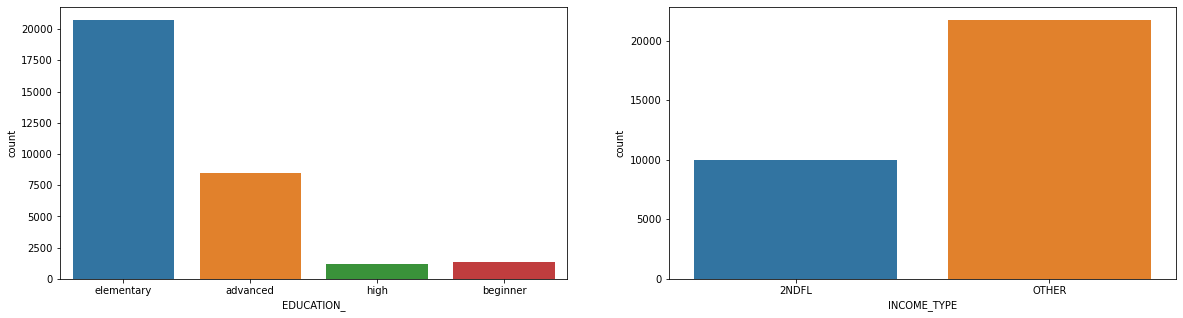

In [360]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(data=accept, x = 'EDUCATION_', ax=axs[0])
sns.countplot(data=accept, x = 'INCOME_TYPE', ax=axs[1])
plt.show()

From the countplots above we can tell the following:

1. EDUCATION_ can be easily ordinally encoded in the order: begginer, elementary, high, advanced

2. INCOME_TYPE can be encoded into a dummy variable (whether income is 2NDFL or not): 1 - 2NDFL, 0 - OTHER

In [361]:
accept['INCOME_TYPE'].unique()

array(['2NDFL', 'OTHER'], dtype=object)

In [362]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
### 1 ###
oe = OrdinalEncoder(categories=[['beginner', 'elementary', 'high', 'advanced']])
accept['EDUCATION_'] = oe.fit_transform(accept[['EDUCATION_']])
### 2 ###
onehot = OneHotEncoder(categories=[['OTHER', '2NDFL']], drop='first')
accept['2NDFL'] = onehot.fit_transform(accept[['INCOME_TYPE']]).toarray()
accept = accept.drop(columns=['INCOME_TYPE'])

In [363]:
accept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31732 entries, 0 to 32553
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   target                             31732 non-null  int64  
 1   EDUCATION_                         31732 non-null  float64
 2   income                             31732 non-null  float64
 3   DEPENDANT_NUMBER                   31732 non-null  float64
 4   IS_EMPL                            31732 non-null  int64  
 5   COUNT_ACTIVE_CREDIT_NO_CC          31732 non-null  float64
 6   CNT_MNTH_FROM_LAST_PMNT            31732 non-null  float64
 7   age                                31732 non-null  float64
 8   experience                         31732 non-null  float64
 9   inquiry_21_day                     31732 non-null  float64
 10  count_mnth_act_passport            31732 non-null  float64
 11  UID                                31732 non-null  int

Data is now ready for further use, no NaN values

In [364]:
accept.columns

Index(['target', 'EDUCATION_', 'income', 'DEPENDANT_NUMBER', 'IS_EMPL',
       'COUNT_ACTIVE_CREDIT_NO_CC', 'CNT_MNTH_FROM_LAST_PMNT', 'age',
       'experience', 'inquiry_21_day', 'count_mnth_act_passport', 'UID',
       'missing_CNT_MNTH_FROM_LAST_PMNT', 'missing_inquiry_21_day',
       'missing_COUNT_ACTIVE_CREDIT_NO_CC', '2NDFL'],
      dtype='object')

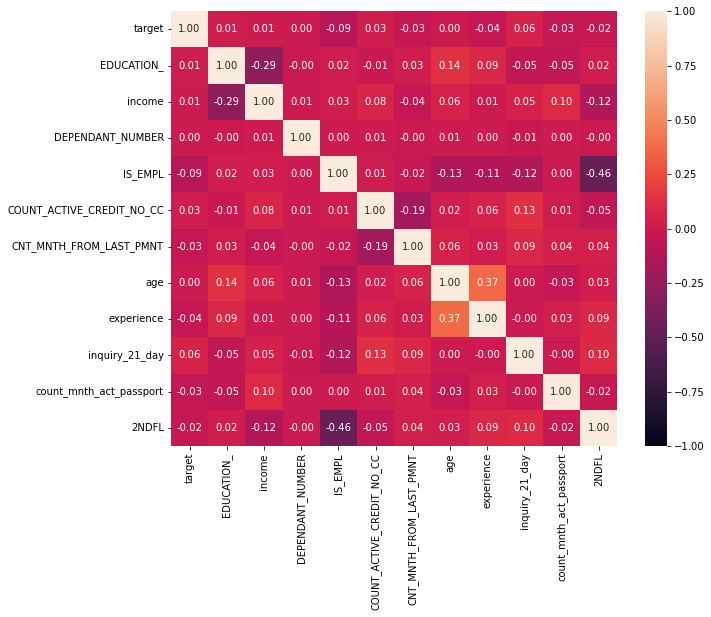

In [365]:
heatmap_cols = accept.drop(columns=['missing_CNT_MNTH_FROM_LAST_PMNT', 'missing_inquiry_21_day', 'missing_COUNT_ACTIVE_CREDIT_NO_CC', 'UID']).columns
sns.heatmap(accept[heatmap_cols].corr(), annot=True, fmt=".2f", vmin=-1, vmax=1);

In [366]:
accept['age'].value_counts()

34.991781    12
26.361644    10
26.917808     9
34.643836     9
29.734247     8
             ..
30.180186     1
25.176233     1
50.326761     1
36.842690     1
25.034404     1
Name: age, Length: 23840, dtype: int64

# Создание дополнительных переменных. Максимально - 1 балл

Будьте креативными, чем больше переменных, тем больше балл! При этом переменные должны быть логичными, нелогичные переменные не принимаются

- 0 баллов, если задание не выполнено
- 0.5 баллов - создана 2 дополнительные переменные 
- 1 балл создано больше 3 переменных 


In [367]:
# pairplot_cols = ['target', 'income', 'DEPENDANT_NUMBER', 'COUNT_ACTIVE_CREDIT_NO_CC', 'CNT_MNTH_FROM_LAST_PMNT',
#                  'age', 'experience', 'inquiry_21_day', 'count_mnth_act_passport']
# sns.pairplot(data=accept[pairplot_cols], hue='target');

## 1. xp_to_age

We can notice that age and experience are relatively correlated, so perhaps we can take the raio of experience to ration to derive a new feature which would describe how much of their life the person has already been working 

In [368]:
accept['xp_to_age'] = accept['experience']/accept['age']
print(f"Corr(xp_to_age, experience) = {accept['xp_to_age'].corr(accept['experience'])}")
print(f"Corr(xp_to_age, age) = {accept['xp_to_age'].corr(accept['age'])}")
accept['xp_to_age'].describe()

Corr(xp_to_age, experience) = 0.96126267772576
Corr(xp_to_age, age) = 0.19199455239676388


count    31732.000000
mean         0.128879
std          0.122797
min          0.001370
25%          0.035790
50%          0.093074
75%          0.183437
max          3.815465
Name: xp_to_age, dtype: float64

The new variable is highly correlated with experince and not so much with age, so it would make sense to replace experience feature with xp_to_age, which means, in our case, to drop experience. 

In [369]:
accept = accept.drop(columns=['experience'])

## ss

In [370]:
pd.crosstab(accept['IS_EMPL'], accept['2NDFL'], normalize=True)

2NDFL,0.0,1.0
IS_EMPL,,
0,0.319551,0.300139
1,0.365026,0.015284


# Построение модели на одобренных заявках. Максимально - 4 балла
Необхоимо построить логистическую регрессию на WoE переменных. 

Если построена любая другая модель, балл = 0

In [371]:
# Помним про разбиение данных на тест и трейн
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(accept, 
                                                accept['target'],
                                                test_size=0.2, 
                                                random_state=42, 
                                                stratify=(accept['target']))



Необходимо расчитать WoE преобразование - максимально - 3 балла



Расчет WoE должен быть в 2 этапа:

1 шаг. Fine Classing (1 балл). Разбиение на большое количество бинов(интервалов)
  - обычно интервальные переменные делят по  20, 30 и так далее интервалов
  - для категориальных переменных - одна категория - одна группа
  - далее для каждой группы рассчитываем WoE

2 шаг. Coarse classing (2 балла). Укрупнение интервалов, которые получены на 1-ом шаге. В итоге должно получится не больше 5-10 интервалов. 
  - Обычно объединяют группы с похожими значениями WoE 
  - WoE должен быть монотонным, то есть после вашего объединения результат должен быть интерпретируемым (необходимо продемонстрировать графически, что WoE монотонен )



In [372]:
# Unique vals for each column to determine which features are interval and which are categorical
unique = {}
for col in accept.columns.tolist():
    unique[col] = accept[col].nunique()
unique_features = pd.DataFrame.from_dict(unique, orient='index').drop(['target', 'UID'])
unique_features

,0
EDUCATION_,4
income,18222
DEPENDANT_NUMBER,5
IS_EMPL,2
COUNT_ACTIVE_CREDIT_NO_CC,9
CNT_MNTH_FROM_LAST_PMNT,16202
age,23840
inquiry_21_day,9
count_mnth_act_passport,20818
missing_CNT_MNTH_FROM_LAST_PMNT,2


In [373]:
interval_features = ['income', 'COUNT_ACTIVE_CREDIT_NO_CC','CNT_MNTH_FROM_LAST_PMNT', 'age', 'inquiry_21_day', 
                     'count_mnth_act_passport', 'xp_to_age']
categorical_features = unique_features.drop(interval_features).index.to_list()

print(interval_features, categorical_features, sep='\n')

['income', 'COUNT_ACTIVE_CREDIT_NO_CC', 'CNT_MNTH_FROM_LAST_PMNT', 'age', 'inquiry_21_day', 'count_mnth_act_passport', 'xp_to_age']
['EDUCATION_', 'DEPENDANT_NUMBER', 'IS_EMPL', 'missing_CNT_MNTH_FROM_LAST_PMNT', 'missing_inquiry_21_day', 'missing_COUNT_ACTIVE_CREDIT_NO_CC', '2NDFL']


In [374]:
# WOE and IV
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [375]:
# делим интервальные переменные на бины
for feature in interval_features:
    accept[feature + '_bin'] = pd.qcut(accept[feature], 20, duplicates='drop')
    accept[feature + '_bin'] = accept[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")
accept

,target,EDUCATION_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,inquiry_21_day,count_mnth_act_passport,UID,missing_CNT_MNTH_FROM_LAST_PMNT,missing_inquiry_21_day,missing_COUNT_ACTIVE_CREDIT_NO_CC,2NDFL,xp_to_age,income_bin,COUNT_ACTIVE_CREDIT_NO_CC_bin,CNT_MNTH_FROM_LAST_PMNT_bin,age_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,xp_to_age_bin
0,0,1.0,56245.0,0.0,0,0.0,0.000000,50.567123,0.0,5.536986,10,1.0,1.0,1.0,1.0,0.042152,"(54466.3, 60000.0]","(-0.001, 1.0]","(-0.001, 0.242]","(49.203, 51.863]","(-0.001, 1.0]","(5.003, 5.537]","(0.0358, 0.0451]"
1,0,1.0,119510.0,0.0,1,1.0,1.115569,28.191781,1.0,8.109589,11,0.0,0.0,0.0,0.0,0.072109,"(114252.8, 153342.9]","(-0.001, 1.0]","(1.049, 1.215]","(27.745, 28.657]","(-0.001, 1.0]","(7.781, 8.352]","(0.0671, 0.0795]"
2,0,3.0,12020.0,0.0,0,1.0,0.303786,36.437742,0.0,9.123535,13,0.0,0.0,0.0,1.0,0.486625,"(-0.001, 15627.1]","(-0.001, 1.0]","(0.242, 0.346]","(36.06, 37.476]","(-0.001, 1.0]","(8.834, 9.234]","(0.374, 3.815]"
3,0,3.0,21611.0,0.0,1,0.0,0.000000,33.333446,0.0,7.972678,15,1.0,1.0,1.0,0.0,0.051346,"(19095.2, 21750.0]","(-0.001, 1.0]","(-0.001, 0.242]","(32.517, 33.641]","(-0.001, 1.0]","(7.781, 8.352]","(0.0451, 0.0555]"
4,0,1.0,146841.0,0.0,1,0.0,30.530914,36.531073,0.0,7.737705,17,0.0,0.0,0.0,0.0,0.015813,"(114252.8, 153342.9]","(-0.001, 1.0]","(23.472, 86.511]","(36.06, 37.476]","(-0.001, 1.0]","(7.219, 7.781]","(0.0115, 0.0158]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,1.0,90000.0,0.0,0,0.0,10.693705,40.642922,0.0,11.528767,138843,0.0,0.0,0.0,0.0,0.119279,"(79994.4, 92236.9]","(-0.001, 1.0]","(4.733, 10.918]","(40.543, 42.263]","(-0.001, 1.0]","(11.104, 11.751]","(0.108, 0.124]"
32550,1,3.0,60000.0,0.0,0,1.0,0.891062,28.163934,1.0,7.242256,139153,0.0,0.0,0.0,0.0,0.118234,"(54466.3, 60000.0]","(-0.001, 1.0]","(0.768, 0.919]","(27.745, 28.657]","(-0.001, 1.0]","(7.219, 7.781]","(0.108, 0.124]"
32551,1,3.0,45000.0,0.0,0,0.0,0.301770,30.703810,1.0,9.325728,139154,0.0,0.0,0.0,0.0,0.046212,"(41235.5, 45000.0]","(-0.001, 1.0]","(0.242, 0.346]","(30.438, 31.441]","(-0.001, 1.0]","(9.234, 9.583]","(0.0451, 0.0555]"
32552,1,3.0,40000.0,0.0,0,0.0,0.000000,29.716581,0.0,6.935759,140165,1.0,1.0,1.0,0.0,0.180477,"(38297.0, 41235.5]","(-0.001, 1.0]","(-0.001, 0.242]","(29.532, 30.438]","(-0.001, 1.0]","(6.665, 7.219]","(0.161, 0.183]"


In [376]:
# разделим на трейн и тест выборку 
from sklearn.model_selection import train_test_split
train, test = train_test_split(accept,
                                test_size=0.3,
                                random_state=17,
                                stratify=accept['target'])

In [377]:
scorecard = pd.DataFrame()

In [378]:
for feature in interval_features:
    
    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    
    train = train.drop(columns = [feature, feature + '_bin', 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})

    
    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])    
    print('feature', feature, '  IV= ',iv)

feature income   IV=  0.19288612788724327
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.04420913428558469
feature CNT_MNTH_FROM_LAST_PMNT   IV=  0.16368575497036844
feature age   IV=  0.054631042330854765
feature inquiry_21_day   IV=  0.10698284398465191
feature count_mnth_act_passport   IV=  0.10173718041059782
feature xp_to_age   IV=  0.13066358738739114


In [379]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    
   
    print('feature', feature, '  IV =  ',iv)

feature EDUCATION_   IV =   0.006497706323924282
feature DEPENDANT_NUMBER   IV =   0.0009746812355162378
feature IS_EMPL   IV =   0.7103419268814932
feature missing_CNT_MNTH_FROM_LAST_PMNT   IV =   0.04054973549166556
feature missing_inquiry_21_day   IV =   0.031431091679376126
feature missing_COUNT_ACTIVE_CREDIT_NO_CC   IV =   0.04325879433591313
feature 2NDFL   IV =   0.034043160383202355


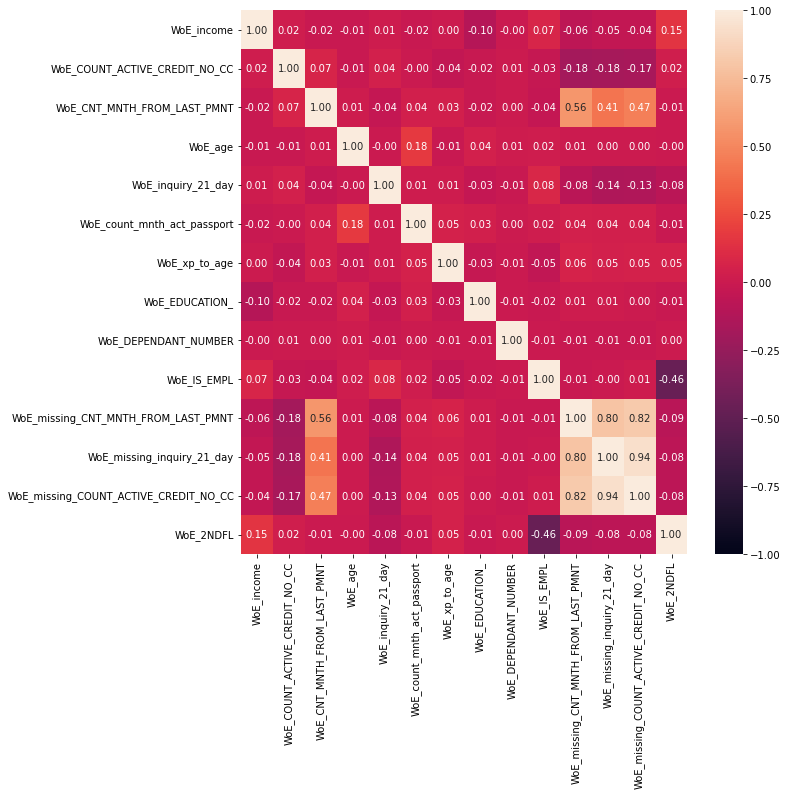

In [380]:
# импорт библиотек для графиков
# матрица корреляций
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlations_woe, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [381]:
features = test.columns.tolist()
features.remove('UID')
features.remove('target')
# исключаем, так как IV<0.02
features.remove('WoE_DEPENDANT_NUMBER')
features.remove('WoE_EDUCATION_')
features.remove('WoE_missing_inquiry_21_day')
features.remove('WoE_missing_COUNT_ACTIVE_CREDIT_NO_CC')

построение и оценка логистической регресии - максимально 1 балл
- построена только логистическая регрессия - 0.3 балла
- сделана оценка модели ( roc auc, f1, и так далее) - 0.3 балла
- построена скоркарта - 0.4 балла

Напомню, что для скоркарты нужны следующие формулы (детали в лекции и семинаре)

Score_i =  (βi × WoE_i + α/n) × Factor + Offset/n, где

- Factor = pdo/ln(2)

- Offset = Target Score — (Factor × ln(Target Odds))

In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [383]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-3.8451985]


,features,coef
0,WoE_income,-0.732095
1,WoE_COUNT_ACTIVE_CREDIT_NO_CC,-0.964864
2,WoE_CNT_MNTH_FROM_LAST_PMNT,-0.922912
3,WoE_age,-0.747583
4,WoE_inquiry_21_day,-0.931469
5,WoE_count_mnth_act_passport,-0.771871
6,WoE_xp_to_age,-0.971424
7,WoE_IS_EMPL,-1.111885
8,WoE_missing_CNT_MNTH_FROM_LAST_PMNT,-0.640134
9,WoE_2NDFL,-2.226237


In [384]:
X_test

,WoE_income,WoE_COUNT_ACTIVE_CREDIT_NO_CC,WoE_CNT_MNTH_FROM_LAST_PMNT,WoE_age,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_xp_to_age,WoE_IS_EMPL,WoE_missing_CNT_MNTH_FROM_LAST_PMNT,WoE_2NDFL
0,0.842898,-0.376015,0.439208,-0.154804,0.096819,0.075780,-0.077063,1.788105,0.158731,-0.113409
1,-0.298321,0.069044,0.024695,-0.153912,0.096819,0.075780,-0.077063,1.788105,0.158731,-0.113409
2,0.273333,0.069044,1.173481,-0.438454,0.096819,0.075780,-0.077063,1.788105,0.158731,-0.113409
3,0.640845,0.069044,0.176773,0.348624,0.096819,-0.077063,-0.077063,1.788105,0.158731,-0.113409
4,-0.059283,0.069044,-0.091088,0.303349,0.096819,-0.212645,-0.077063,1.788105,0.158731,-0.113409
...,...,...,...,...,...,...,...,...,...,...
9515,0.640845,0.069044,-0.277436,0.404939,0.096819,0.424922,-0.346080,-0.421178,-0.256328,0.301034
9516,0.273333,0.069044,-0.277436,-0.153912,0.096819,0.217098,-0.433364,-0.421178,-0.256328,0.301034
9517,0.842898,0.069044,-0.277436,-0.212645,0.096819,-0.212645,-0.184684,-0.421178,-0.256328,0.301034
9518,0.273333,0.069044,-0.277436,0.120920,0.096819,-0.388116,-0.292806,-0.421178,-0.256328,0.301034


In [411]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


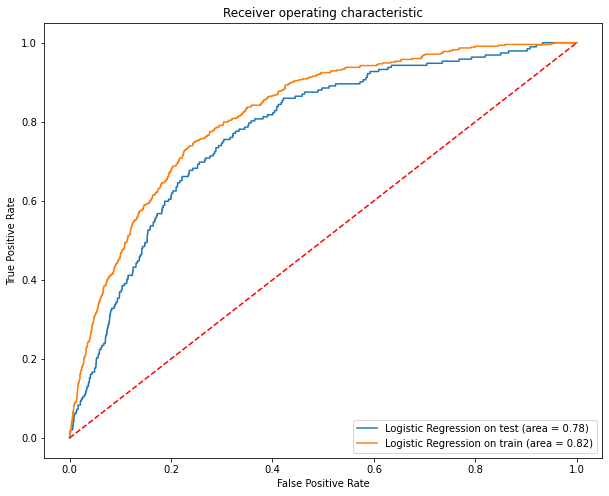

In [386]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, confusion_matrix

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [391]:
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.025549, G-Mean=1.226


In [393]:
cutoff = thresholds[ix]
predictions_01 = np.where(logreg.predict_proba(X_test)[:,1] > cutoff, 1, 0) #Turn probability to 0-1 binary output
test['predictions_01'] = [el for el in predictions_01]

<Figure size 720x576 with 0 Axes>

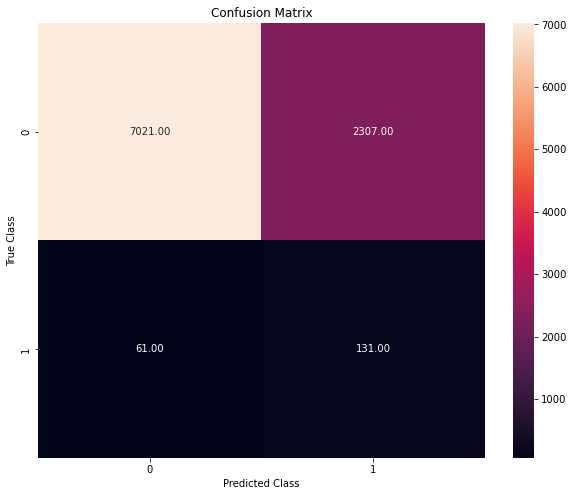

In [408]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, test['predictions_01'])
labels = ['0', '1']
plt.figure(figsize=(10,8))
sns.heatmap(cm, 
            xticklabels = labels,
            yticklabels = labels,
            annot = True, 
            fmt=".2f",
            )
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [409]:
cm

array([[7021, 2307],
       [  61,  131]])

In [399]:
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1,0])

print('precision=%f, recall=%.3f' % (precision, recall))

precision=0.053733, recall=0.682


In [410]:
#f1 score
f1 = 2 * precision * recall / (precision + recall)
f1

0.09961977186311788

In [404]:
# калибровка 
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(features_coefs,how='inner', on='features')
scorecard = scorecard.drop(columns = 'features')
scorecard

,feature,Value,WoE,coef
0,income,"(54466.3, 60000.0]",-0.765163,-0.732095
1,income,"(45000.0, 50000.0]",-0.529251,-0.732095
2,income,"(69495.25, 79994.4]",-0.355503,-0.732095
3,income,"(38297.0, 41235.5]",-0.298321,-0.732095
4,income,"(79994.4, 92236.9]",-0.249013,-0.732095
...,...,...,...,...
100,IS_EMPL,1,1.788105,-1.111885
101,missing_CNT_MNTH_FROM_LAST_PMNT,1.0,-0.256328,-0.640134
102,missing_CNT_MNTH_FROM_LAST_PMNT,0.0,0.158731,-0.640134
103,2NDFL,0.0,-0.113409,-2.226237


In [405]:
pdo = 20 
Target_Odds = 50 
Target_Score = 600
Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [406]:
scorecard['score'] = (-1)*(scorecard['coef']*scorecard['WoE'] + intercept/13)*Factor + Offset/13
scorecard['score'] = scorecard['score'].round(0)
scorecard['WoE'] = scorecard['WoE'].round(2)
scorecard['coef'] = scorecard['coef'].round(2)
scorecard

,feature,Value,WoE,coef,score
0,income,"(54466.3, 60000.0]",-0.77,-0.73,30.0
1,income,"(45000.0, 50000.0]",-0.53,-0.73,35.0
2,income,"(69495.25, 79994.4]",-0.36,-0.73,38.0
3,income,"(38297.0, 41235.5]",-0.30,-0.73,40.0
4,income,"(79994.4, 92236.9]",-0.25,-0.73,41.0
...,...,...,...,...,...
100,IS_EMPL,1,1.79,-1.11,103.0
101,missing_CNT_MNTH_FROM_LAST_PMNT,1.0,-0.26,-0.64,41.0
102,missing_CNT_MNTH_FROM_LAST_PMNT,0.0,0.16,-0.64,49.0
103,2NDFL,0.0,-0.11,-2.23,39.0


# Reject Inference (Анализ отклоненных заявок). Максимально -  3 балла
- проведен анализ отклоненых заявок и сравнение с одобренными заявками - 0.2 балла
- проведена разметка отклоненных заявок одним методом (метод можно взять либо из семинара/лекции или любой другой логичный метод, просто всем ставить 1 - нельзя) - 1 балл
- построена общая логистическая регрессия с WoE переменными на одобренных и отказанных заявках - 1 балл
- построена скоркарта - 0.3 балла
- сделан вывод и даны рекомендации какую модель внедрять в продакшен среду 0.3 балла
- даны рекомендации как реализовать мониторинг модели после внедрения в продакшен 0.2 балла

In [388]:
# YOUR CODE HERE

_Опционально, для тех , кто добрался до конца ноутбука_ 😊

ваше впечатление от работы. 
Что было сложно? 
Что было интересно?